In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import itertools 
import numpy as np
import pandas as pd

from google.cloud import bigquery
from google.oauth2 import service_account
from datetime import datetime
from dateutil.relativedelta import relativedelta
from functions import *
from constants import *
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------

pd.set_option('display.max_columns', None)

#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------

RESULTADOS PRIMEER CONSULTA:


,FECHA_EJECUCION,TEST,MODEL,FORECAST_TO_DO,MONTHS_TO_FORECAST,MONTHS_TO_TEST,FROM_YEAR,TOTAL_MODELOS,MAPE_DEACERO,P15,P50,P85,MIN_MAPE_DEACERO,MAX_MAPE_DEACERO,NUMERO_COMBINACIONES
0,2025-09-30 14:17:05,1,Todos los modelos,ToneladasFacturadas,6,6,2022,8,2652.251763,14.4865,47.5478,90.7416,0.0,8.059797e+06,860


PARAMETROS DE EJECUCION:
2022 6 6


In [2]:
FACT = load_fact_pvo_pv()
FACT = add_zeros(FACT, pd.to_datetime("2024-08-01"), min_year = 2022)
FACT.sample(5)

Consultando PV
Consultando PVO
Consultando FACT
2782
2782
2782
(79991, 11)
0 NombreGrupo
1 NombreDireccion
2 NombreSubdireccion
3 NombreGrupoEstadistico1
4 NombreGrupoEstadistico2
5 NombreGrupoEstadistico3
2091


,MesAnio,id,NombreGrupo,NombreDireccion,NombreSubdireccion,NombreGrupoEstadistico1,NombreGrupoEstadistico2,NombreGrupoEstadistico3,toneladas_pvo,toneladas_plan_ventas,toneladas_facturadas,valid_ton,TP_MESES,TP_MOVIL,id2
76901,2022-02-01,TRASPASOS E INTEREMPRESAS_EXPORTACION FILIALES...,TRASPASOS E INTEREMPRESAS,EXPORTACION FILIALES,FILIALES,MALLAS Y ALAMBRES,INDUSTRIAL GALV.,MULTIMALLA PARA LASTRAR,NaN,NaN,NaN,0.000,NaN,0.0,FILIALES_MULTIMALLA PARA LASTRAR
43700,2022-01-01,ALAMBRES_ALMACEN ANSA_ALMACEN ANSA_MALLAS Y AL...,ALAMBRES,ALMACEN ANSA,ALMACEN ANSA,MALLAS Y ALAMBRES,SISTEMAS CONSTRUCTIVOS,TORON DE PRESFUERZO,NaN,NaN,NaN,0.000,NaN,NaN,ALMACEN ANSA_TORON DE PRESFUERZO
104623,2023-12-01,USA_EUA - CANADA_INDUSTRIAL WIRE_MALLAS Y ALAM...,USA,EUA - CANADA,INDUSTRIAL WIRE,MALLAS Y ALAMBRES,INDUSTRIAL NEGROS,SEMI-FLECHA INDS.,40.0,40.0,46.971,126.971,4.54,7.645,INDUSTRIAL WIRE_SEMI-FLECHA INDS.
75857,2022-08-01,TRASPASOS E INTEREMPRESAS_EXPORTACION FILIALES...,TRASPASOS E INTEREMPRESAS,EXPORTACION FILIALES,FILIALES,MALLAS Y ALAMBRES,INDUSTRIAL FASTENERS,CLAVO C/C ANILL/ROL PARA MAQ,NaN,NaN,221.048,221.048,NaN,444.120833,FILIALES_CLAVO C/C ANILL/ROL PARA MAQ
14431,2024-08-01,ALAMBRES_ALAMBRES_CENTRO SUR_MALLAS Y ALAMBRES...,ALAMBRES,ALAMBRES,CENTRO SUR,MALLAS Y ALAMBRES,CERCOS ESPECIALIZADOS,REJA GALVANIZADA,0.0,0.0,0.000,0.000,0.00,0.0,CENTRO SUR_REJA GALVANIZADA


In [3]:
FACT.MesAnio.unique()

<DatetimeArray>
['2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2022-07-01 00:00:00', '2022-08-01 00:00:00', '2022-09-01 00:00:00',
 '2022-10-01 00:00:00', '2022-11-01 00:00:00', '2022-12-01 00:00:00',
 '2023-01-01 00:00:00', '2023-02-01 00:00:00', '2023-03-01 00:00:00',
 '2023-04-01 00:00:00', '2023-05-01 00:00:00', '2023-06-01 00:00:00',
 '2023-07-01 00:00:00', '2023-08-01 00:00:00', '2023-09-01 00:00:00',
 '2023-10-01 00:00:00', '2023-11-01 00:00:00', '2023-12-01 00:00:00',
 '2024-01-01 00:00:00', '2024-02-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:00:00', '2024-06-01 00:00:00',
 '2024-07-01 00:00:00', '2024-08-01 00:00:00', '2024-09-01 00:00:00',
 '2024-10-01 00:00:00', '2024-11-01 00:00:00', '2024-12-01 00:00:00',
 '2025-01-01 00:00:00', '2025-02-01 00:00:00', '2025-03-01 00:00:00',
 '2025-04-01 00:00:00', '2025-05-01 00:00:00', '2025-06-01 00:00:00',
 '20

In [8]:
FACT.NombreDireccion.unique()

array(['ACEROS MEXICO', 'EXPORTACION ACEROS', 'ALAMBRES', 'ALMACEN ANSA',
       'EXPORTACIÓN ALAMBRES', 'INGETEK', 'DEACERO CABLES MEXICO',
       'DEACERO SUMMIT', 'INDASA', 'TURIA', 'EXPORTACION FILIALES',
       'FILIALES', 'EUA - CANADA'], dtype=object)

In [ ]:
ids = FACT.groupby("id").toneladas_facturadas.sum().sort_values()
ids = ids[ids > 0.01 ]
ids

id
ALAMBRES_ALAMBRES_GOBIERNO_MALLAS Y ALAMBRES_CERCOS ESPECIALIZADOS_ALAMBRE DE PÚAS HT                               0.013000
TRASPASOS E INTEREMPRESAS_EXPORTACION FILIALES_FILIALES_MALLAS Y ALAMBRES_FASTENERS MCSW_SCREWS                     0.015422
TRASPASOS E INTEREMPRESAS_EXPORTACION FILIALES_FILIALES_MALLAS Y ALAMBRES_CERCOS ESPECIALIZADOS_FENCE TOOLS         0.022000
ACEROS_ACEROS MEXICO_MAYORISTAS ACEROS_MALLAS Y ALAMBRES_CERCOS_SEPARADORES                                         0.024000
USA_EUA - CANADA_INDUSTRIAL WIRE_MALLAS Y ALAMBRES_CERCOS ESPECIALIZADOS_FENCE TOOLS                                0.037973
                                                                                                                   ...      
TRASPASOS E INTEREMPRESAS_EXPORTACION FILIALES_FILIALES_VARILLA_VARILLA _VARILLA 1/2                           261853.641880
USA_EUA - CANADA_KEY STEEL ACCOUNTS_VARILLA_VARILLA _VARILLA 1/2                                               267782.4340

# Modelación de Varilla x Grupo

In [ ]:
map_bu = {
    "ACEROS MEXICO" : "ACEROS MEXICO" , 
    "EXPORTACION ACEROS" : "EXPORTACION ACEROS",
    "ALAMBRES": "ALAMBRES MÉXICO",
    "ALMACEN ANSA" : "ALAMBRES MÉXICO",
    "EXPORTACIÓN ALAMBRES" :"EXPORTACIÓN ALAMBRES" ,
    "INDASA": "FILIALES ALAMBRES",
    "TURIA" : "FILIALES ALAMBRES",  
    "EUA - CANADA" : "EUA - CANADA",
    "FILIALES" :  "DEACERO SOLUTIONS"
    }
FACT["BU"] = FACT.

In [ ]:
FACT["BU"] = FACT["NombreDireccion"].map(map_bu)

In [35]:
FACT[(FACT["NombreGrupoEstadistico1"] == "VARILLA") & (FACT.MesAnio <="2025-08-01" )].groupby(["NombreGrupo","NombreDireccion","MesAnio"]).toneladas_facturadas.sum().unstack(["NombreGrupo", "NombreDireccion"]).round(1)

NombreGrupo            ACEROS                    ALAMBRES               \
NombreDireccion ACEROS MEXICO EXPORTACION ACEROS ALAMBRES ALMACEN ANSA   
MesAnio                                                                  
2022-01-01            22889.0            23405.2  17737.3        118.0   
2022-02-01            20019.9            14546.9  15833.5        110.6   
2022-03-01            23928.0            18593.6  19600.7        166.7   
2022-04-01            17924.9             8983.9  13561.1        110.1   
2022-05-01            17628.9            12044.4  13747.4         37.0   
2022-06-01            11221.5            39318.5  10882.6         67.2   
2022-07-01             9833.0            26332.7  10062.7        107.7   
2022-08-01             9780.7            31554.7  15817.1         47.5   
2022-09-01            13076.9            18160.3  13592.5         49.2   
2022-10-01            14402.9            11889.7  16168.4         83.8   
2022-11-01            15057.6            23181.5  18008.5         56.2   
2022-12-01            19026.0            24581.3  18376.7         72.7   
2023-01-01            19490.0            22598.8  18785.9         65.8   
2023-02-01            18408.9            25443.2  17300.8         35.2   
2023-03-01            17094.9            22639.2  14981.1         26.3   
2023-04-01            14215.4            11480.1  14427.8         12.9   
2023-05-01            13323.3                0.0  16367.5         56.2   
2023-06-01            15951.8             7100.5  12558.2         54.9   
2023-07-01            14952.8             6355.9  13685.2         72.7   
2023-08-01            20847.2                0.0  18014.2         98.1   
2023-09-01            19414.8            11766.4  20071.5        168.7   
2023-10-01            19999.6            11541.9  21374.0         97.6   
2023-11-01            25671.8             6213.3  19616.8         50.6   
2023-12-01            23055.7             5531.3  15684.2         69.8   
2024-01-01            23622.1                0.0  16341.4         73.5   
2024-02-01            10992.5             6217.2   9119.6        111.2   
2024-03-01            12555.1                0.0  11330.1         37.8   
2024-04-01            22134.9             8067.0  16292.0         33.5   
2024-05-01            18293.3                0.0  13941.9         36.4   
2024-06-01            23388.7                0.0  12202.8         43.3   
2024-07-01            10951.6             7999.4   9463.1         25.6   
2024-08-01            18587.8             7721.4  10623.1         55.3   
2024-09-01            14100.1               20.8  12510.7         16.6   
2024-10-01            19064.2               16.1  12586.7         74.9   
2024-11-01            19772.8                0.0  12033.4         50.8   
2024-12-01            20399.7             7132.1  12146.4         25.8   
2025-01-01            20961.7             4949.1  13591.8         93.3   
2025-02-01            18991.9                0.0  16767.6         70.3   
2025-03-01            24709.9             7056.3  17725.9        118.2   
2025-04-01            24961.9                0.0  15274.4         87.7   
2025-05-01            20329.2             6311.4  17578.9         99.8   
2025-06-01            20374.9             6934.0  13817.0         58.7   
2025-07-01            20213.9                0.0  15313.3        108.8   
2025-08-01            19541.1             7302.2  16275.3         76.5   

NombreGrupo                          DEACERO SOLUTIONS FILIALES ALAMBRES  \
NombreDireccion EXPORTACIÓN ALAMBRES           INGETEK            INDASA   
MesAnio                                                                    
2022-01-01                     178.7           10872.6            1508.7   
2022-02-01                     416.2           11111.4            1815.7   
2022-03-01                     412.1           11389.7            2240.7   
2022-04-01                      34.5           10679.6           

In [33]:
7485.3 + 1943.9, 16275.3 + 76.5, 15313.3 + 108.8	

(9429.2, 16351.8, 15422.099999999999)

<Axes: xlabel='MesAnio'>

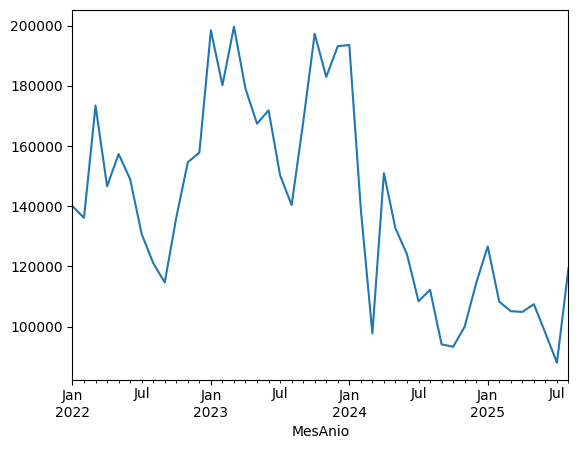

In [26]:
 FACT[(FACT["NombreGrupoEstadistico1"] == "VARILLA") & (FACT.MesAnio <="2025-08-01" )].groupby("MesAnio").toneladas_facturadas.sum().round(1).plot()

<Axes: xlabel='MesAnio'>

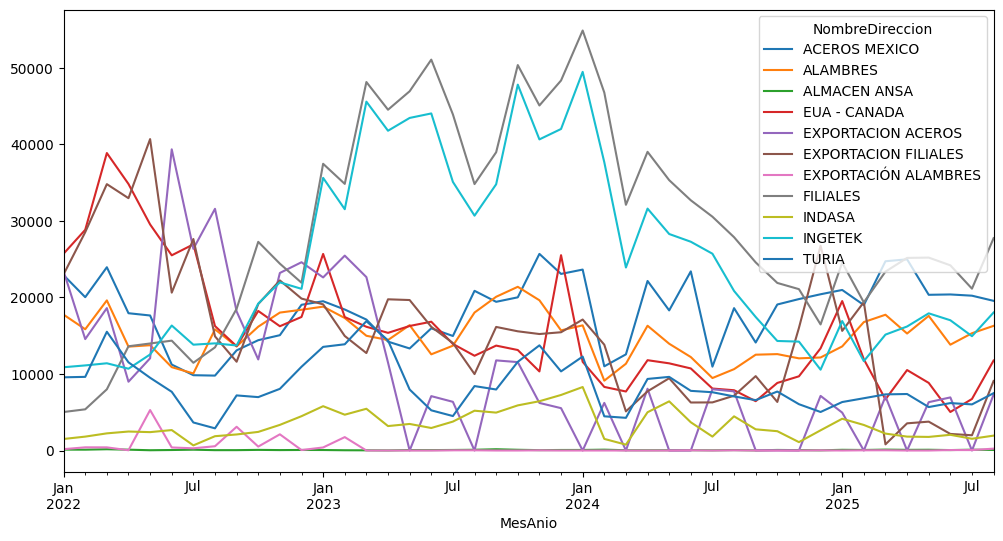

In [ ]:
DIRS = 
FACT[(FACT["NombreGrupoEstadistico1"] == "VARILLA") & (FACT.MesAnio <="2025-08-01" )].groupby(["NombreDireccion","MesAnio"]).toneladas_facturadas.sum().unstack(["NombreDireccion"]).round(1).plot(figsize=(12,6))

<Axes: xlabel='MesAnio'>

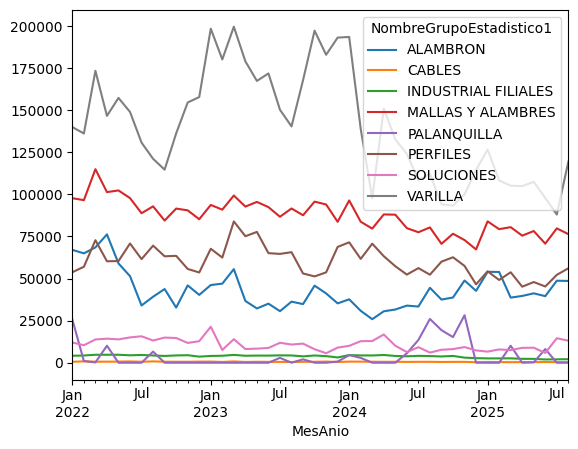

In [8]:
FACT[(FACT.NombreGrupo != "'TRASPASOS E INTEREMPRESAS") & (FACT.MesAnio <= '2025-08-01') & (FACT.id.isin(ids.index))].groupby(["NombreGrupoEstadistico1", "MesAnio"]).toneladas_facturadas.sum().unstack("NombreGrupoEstadistico1").plot()

<Axes: xlabel='MesAnio'>

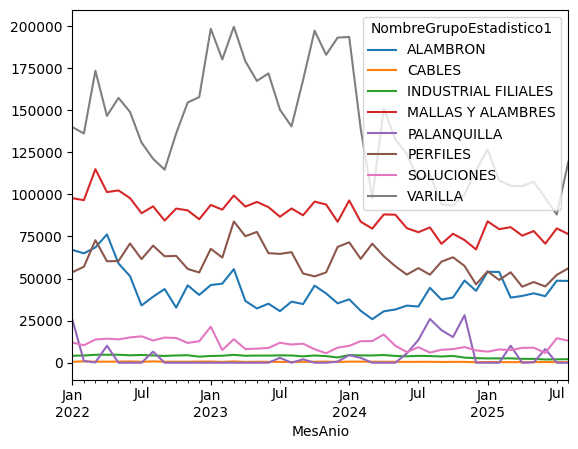

In [11]:
FACT[(FACT.NombreGrupo != "'TRASPASOS E INTEREMPRESAS") &(FACT.MesAnio <= '2025-08-01') & (FACT.id.isin(ids.index)) ].groupby(["NombreGrupoEstadistico1", "MesAnio"]).toneladas_facturadas.sum().unstack("NombreGrupoEstadistico1").plot()

In [12]:
FACT[(FACT.NombreGrupo != "'TRASPASOS E INTEREMPRESAS") &(FACT.MesAnio <= '2025-08-01') & (FACT.id.isin(ids.index)) ].groupby("MesAnio").toneladas_facturadas.sum()


MesAnio
2022-01-01    400926.736036
2022-02-01    371230.931655
2022-03-01    449040.646366
2022-04-01    414268.369778
2022-05-01    398317.759008
2022-06-01    389261.657765
2022-07-01    336028.094267
2022-08-01    347722.123110
2022-09-01    325693.552119
2022-10-01    343666.947956
2022-11-01    363577.961090
2022-12-01    354029.341331
2023-01-01    432100.745120
2023-02-01    392744.012168
2023-03-01    457854.499541
2023-04-01    396384.362510
2023-05-01    386073.490818
2023-06-01    378005.023561
2023-07-01    351871.392322
2023-08-01    349552.573532
2023-09-01    361003.992051
2023-10-01    402905.724828
2023-11-01    382026.327124
2023-12-01    394154.720177
2024-01-01    418877.551045
2024-02-01    335834.142397
2024-03-01    291784.414291
2024-04-01    354808.428502
2024-05-01    324238.577945
2024-06-01    306498.716040
2024-07-01    302923.569824
2024-08-01    325952.967005
2024-09-01    293534.503383
2024-10-01    299173.119524
2024-11-01    320248.061890
2024-12-01  

In [13]:
# -*- coding: utf-8 -*-
"""
Pronóstico de demanda de varilla con LightGBM:
- Feature engineering (lags y ventanas móviles)
- Validación cruzada temporal (backtesting con ventana expansiva)
- Optimización de hiperparámetros con Optuna
- Entrenamiento repetido (ensembles por seeds) y pronóstico recursivo multi‑paso

Requisitos:
    pip install lightgbm optuna pandas numpy scikit-learn

Entrada esperada:
    Un DataFrame 'df' con al menos:
        - 'fecha' (datetime64[ns])
        - 'y' (float): demanda de varilla (target)
    Opcional:
        - 'id' (str/int): si hay múltiples series (producto/sucursal/etc.)
        - Otras variables exógenas ya alineadas temporalmente (numéricas o categóricas)

Nota:
    - Métrica principal: sMAPE (robusta a ceros, común en demanda intermitente)
    - No hay fugas: los lags/ventanas se calculan sólo con pasado.
"""

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from typing import List, Optional, Tuple, Dict
from dataclasses import dataclass
import lightgbm as lgb
import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

# ==============================
# Utilidades de métricas y fechas
# ==============================

def smape(y_true: np.ndarray, y_pred: np.ndarray, epsilon: float = 1e-6) -> float:
    """
    Symmetric Mean Absolute Percentage Error (sMAPE), en porcentaje [0, 200].
    Robusta a ceros.
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = (np.abs(y_true) + np.abs(y_pred)).clip(min=epsilon)
    return float(np.mean(200.0 * np.abs(y_pred - y_true) / denom))


def infer_frequency(dates: pd.Series) -> str:
    """
    Intenta inferir la frecuencia temporal (p.ej. 'D', 'W', 'M').
    Si falla, asume diaria.
    """
    dates_sorted = pd.Series(pd.to_datetime(dates.unique())).sort_values()
    try:
        freq = pd.infer_freq(dates_sorted)
        return freq if freq is not None else "D"
    except Exception:
        return "D"


# ==============================
# Feature engineering
# ==============================

def add_time_features(df: pd.DataFrame, date_col: str = "fecha") -> pd.DataFrame:
    """Agrega features temporales estándar (no causa fuga)."""
    d = df.copy()
    d[date_col] = pd.to_datetime(d[date_col])
    d["year"] = d[date_col].dt.year
    d["quarter"] = d[date_col].dt.quarter
    d["month"] = d[date_col].dt.month
    d["weekofyear"] = d[date_col].dt.isocalendar().week.astype(int)
    d["day"] = d[date_col].dt.day
    d["dayofweek"] = d[date_col].dt.dayofweek
    d["is_month_start"] = d[date_col].dt.is_month_start.astype(int)
    d["is_month_end"] = d[date_col].dt.is_month_end.astype(int)
    d["is_quarter_start"] = d[date_col].dt.is_quarter_start.astype(int)
    d["is_quarter_end"] = d[date_col].dt.is_quarter_end.astype(int)
    return d


def make_lag_features(
    df: pd.DataFrame,
    target_col: str = "y",
    lags: List[int] = [1, 2, 3, 7, 14, 28],
    roll_windows: List[int] = [7, 14, 28],
    id_col: Optional[str] = None,
    date_col: str = "fecha"
) -> pd.DataFrame:
    """
    Genera lags y estadísticas móviles del target por serie (id) o globalmente si no hay id.
    """
    d = df.copy()
    d = d.sort_values([id_col, date_col] if id_col in d.columns else [date_col])

    group_keys = [id_col] if (id_col is not None and id_col in d.columns) else None
    gb = d.groupby(group_keys) if group_keys else [(None, d)]

    frames = []
    for _, g in gb if group_keys else gb:
        g2 = g.copy()
        for L in lags:
            g2[f"lag_{L}"] = g2[target_col].shift(L)
        for W in roll_windows:
            # Medidas robustas y de tendencia
            g2[f"rmean_{W}"] = g2[target_col].shift(1).rolling(W).mean()
            g2[f"rmedian_{W}"] = g2[target_col].shift(1).rolling(W).median()
            g2[f"rstd_{W}"] = g2[target_col].shift(1).rolling(W).std()
            g2[f"rmin_{W}"] = g2[target_col].shift(1).rolling(W).min()
            g2[f"rmax_{W}"] = g2[target_col].shift(1).rolling(W).max()
        frames.append(g2)

    dd = pd.concat(frames, axis=0)
    return dd


def prepare_dataset(
    df: pd.DataFrame,
    target_col: str = "y",
    id_col: Optional[str] = "id",
    date_col: str = "fecha",
    lags: List[int] = [1, 2, 3, 7, 14, 28],
    roll_windows: List[int] = [7, 14, 28],
    drop_na: bool = True
) -> pd.DataFrame:
    """
    Pipeline de features: temporales + lags/ventanas.
    """
    d = df.copy()
    d[date_col] = pd.to_datetime(d[date_col])
    d = add_time_features(d, date_col=date_col)
    d = make_lag_features(d, target_col=target_col, lags=lags, roll_windows=roll_windows, id_col=id_col, date_col=date_col)

    if drop_na:
        d = d.dropna().reset_index(drop=True)
    return d


# ==============================
# Folds de validación temporal (backtesting)
# ==============================

def build_rolling_origin_folds(
    df: pd.DataFrame,
    date_col: str,
    n_splits: int,
    horizon: int,
    min_train_periods: int = 60
) -> List[Tuple[np.ndarray, np.ndarray]]:
    """
    Construye n_splits folds de backtesting con ventana expansiva y validación de longitud 'horizon' (pasos).
    - Usa fechas globales (funciona para series múltiples alineadas por fecha).
    - Cada fold: train = [inicio : t), valid = [t : t+horizon)
    """
    dates = pd.Series(pd.to_datetime(df[date_col].unique())).sort_values().reset_index(drop=True)
    if len(dates) < (n_splits * horizon + min_train_periods):
        raise ValueError("No hay suficientes períodos para los folds solicitados. Reduce n_splits/horizon o usa más datos.")

    start_val_idx = len(dates) - n_splits * horizon
    folds = []
    for i in range(n_splits):
        train_end_idx = start_val_idx + i * horizon
        valid_start_idx = train_end_idx
        valid_end_idx = valid_start_idx + horizon

        train_dates = set(dates.iloc[:train_end_idx].tolist())
        valid_dates = set(dates.iloc[valid_start_idx:valid_end_idx].tolist())

        train_idx = df[date_col].isin(train_dates).values.nonzero()[0]
        valid_idx = df[date_col].isin(valid_dates).values.nonzero()[0]
        # Asegurar mínimo de entrenamiento
        if len(train_dates) < min_train_periods:
            continue
        folds.append((train_idx, valid_idx))

    if len(folds) == 0:
        raise ValueError("No se pudieron construir folds válidos. Ajusta parámetros.")
    return folds


# ==============================
# Entrenamiento con Optuna
# ==============================

@dataclass
class TrainingConfig:
    target_col: str = "y"
    id_col: Optional[str] = "id"
    date_col: str = "fecha"
    n_splits: int = 5
    horizon: int = 4
    min_train_periods: int = 60
    n_trials: int = 50
    early_stopping_rounds: int = 200
    num_boost_round: int = 5000
    learning_rate_bounds: Tuple[float, float] = (1e-3, 0.2)
    seeds_for_ensemble: List[int] = (42, 202, 777)  # cuántas veces entrenas (ensembles)
    lags: List[int] = (1, 2, 3, 7, 14, 28)
    roll_windows: List[int] = (7, 14, 28)


def get_feature_target_matrices(
    df: pd.DataFrame,
    config: TrainingConfig
) -> Tuple[pd.DataFrame, pd.Series, List[str], List[str]]:
    """
    Devuelve X, y y listas de columnas numéricas/categóricas para LightGBM.
    """
    # Columnas a excluir (fecha y target)
    exclude = {config.date_col, config.target_col}

    # Detección de categóricas (id como categoría si existe; el resto inferido por dtype)
    cat_cols = []
    if config.id_col and config.id_col in df.columns:
        # Convertir id a categoría estable (LabelEncoder deja int, mejor dtype category)
        if not pd.api.types.is_categorical_dtype(df[config.id_col]):
            df[config.id_col] = df[config.id_col].astype("category")
        cat_cols.append(config.id_col)

    # Otras categóricas por dtype 'category'
    for c in df.columns:
        if c not in exclude and pd.api.types.is_categorical_dtype(df[c]) and c not in cat_cols:
            cat_cols.append(c)

    # Todas las features
    feature_cols = [c for c in df.columns if c not in exclude]

    X = df[feature_cols].copy()
    y = df[config.target_col].astype(float).copy()

    # LightGBM maneja pandas category nativamente si se pasa por nombre
    num_cols = [c for c in feature_cols if c not in cat_cols]
    return X, y, num_cols, cat_cols


def optuna_objective_factory(
    df_features: pd.DataFrame,
    config: TrainingConfig
):
    """
    Crea una función objetivo para Optuna que hace backtesting con n_splits folds
    y retorna el promedio de sMAPE (minimizar).
    """
    X, y, num_cols, cat_cols = get_feature_target_matrices(df_features, config)
    folds = build_rolling_origin_folds(df_features, config.date_col, config.n_splits, config.horizon, config.min_train_periods)

    def objective(trial: optuna.Trial) -> float:
        # Espacio de hiperparámetros
        params = {
            "objective": "mae",  # robusto para demanda
            "metric": "mae",
            "boosting_type": "gbdt",
            "verbosity": -1,
            "n_estimators": config.num_boost_round,
            "learning_rate": trial.suggest_float("learning_rate", *config.learning_rate_bounds, log=True),
            "num_leaves": trial.suggest_int("num_leaves", 15, 255, step=1),
            "max_depth": trial.suggest_int("max_depth", 3, 16),
            "min_child_samples": trial.suggest_int("min_child_samples", 10, 200),
            "min_split_gain": trial.suggest_float("min_split_gain", 0.0, 1.0),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),            # bagging_fraction
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),  # feature_fraction
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
            "random_state": 42,
        }

        fold_scores = []
        for (tr_idx, va_idx) in folds:
            X_tr, y_tr = X.iloc[tr_idx], y.iloc[tr_idx]
            X_va, y_va = X.iloc[va_idx], y.iloc[va_idx]

            model = lgb.LGBMRegressor(**params)
            model.fit(
                X_tr,
                y_tr,
                eval_set=[(X_va, y_va)],
                eval_metric="l1",
                callbacks=[
                    lgb.early_stopping(stopping_rounds=config.early_stopping_rounds, verbose=False)
                ],
                categorical_feature=cat_cols if len(cat_cols) > 0 else "auto"
            )
            y_hat = model.predict(X_va, num_iteration=model.best_iteration_)
            fold_scores.append(smape(y_va.values, y_hat))

        return float(np.mean(fold_scores))

    return objective


# ==============================
# Forecast recursivo multi‑paso
# ==============================

def recursive_forecast(
    df_full: pd.DataFrame,
    model: lgb.LGBMRegressor,
    horizon: int,
    config: TrainingConfig
) -> pd.DataFrame:
    """
    Genera pronóstico recursivo h pasos usando las mismas transformaciones.
    - Para múltiples series (id), pronostica cada paso para todos los ids y actualiza lags.
    - Asume que las features temporales del futuro se pueden derivar de la fecha.
    """
    id_col, date_col, target_col = config.id_col, config.date_col, config.target_col
    lags = list(config.lags)
    rolls = list(config.roll_windows)

    # Orden y última fecha
    df_hist = df_full.sort_values([id_col, date_col] if id_col in df_full.columns else [date_col]).copy()
    last_date = pd.to_datetime(df_hist[date_col].max())
    freq = infer_frequency(df_hist[date_col])

    # Fechas futuras
    future_dates = pd.date_range(start=last_date, periods=horizon+1, freq=freq, inclusive="right")

    # Contenedor de predicciones
    preds_list = []

    # Mantenemos un "buffer" histórico que vamos extendiendo con predicciones
    df_buffer = df_hist.copy()

    for step, dt in enumerate(future_dates, start=1):
        # Crear frame "plantilla" con filas de todos los ids en la fecha dt
        if id_col and id_col in df_buffer.columns:
            ids = df_buffer[id_col].unique()
            df_step = pd.DataFrame({date_col: dt, id_col: ids})
        else:
            df_step = pd.DataFrame({date_col: [dt]})

        # No conocemos y futura; ponemos NaN temporalmente
        df_step[target_col] = np.nan

        # Unimos a buffer y re-creamos features lags/rollings correctamente
        df_tmp = pd.concat([df_buffer, df_step], axis=0, ignore_index=True)
        df_tmp = prepare_dataset(
            df_tmp,
            target_col=target_col,
            id_col=id_col,
            date_col=date_col,
            lags=lags,
            roll_windows=rolls,
            drop_na=False
        )

        # Tomar sólo la fecha actual para predecir (después de features)
        X_all, _, _, cat_cols = get_feature_target_matrices(df_tmp, config)
        mask_current = df_tmp[date_col] == dt
        X_current = X_all.loc[mask_current].copy()

        # Remover columnas target del set por seguridad (ya excluidas en get_feature_target_matrices)
        y_hat = model.predict(X_current, num_iteration=getattr(model, "best_iteration_", None))

        # Reinyectar predicción al buffer para poder generar lags del siguiente paso
        df_tmp.loc[mask_current, target_col] = y_hat
        # Actualizar buffer sólo con columnas originales mínimas (fecha, id, y, + exógenas si hubiera)
        keep_cols = [c for c in df_hist.columns]  # conserva esquema original
        df_buffer = pd.concat([df_buffer, df_tmp.loc[mask_current, keep_cols]], axis=0, ignore_index=True)

        # Guardar predicciones
        if id_col and id_col in df_buffer.columns:
            out = df_tmp.loc[mask_current, [date_col, id_col]].copy()
        else:
            out = df_tmp.loc[mask_current, [date_col]].copy()
        out["y_hat"] = y_hat
        preds_list.append(out)

    df_preds = pd.concat(preds_list, axis=0).reset_index(drop=True)
    return df_preds


# ==============================
# Pipeline principal
# ==============================

def train_and_forecast(
    df: pd.DataFrame,
    horizon: int = 4,
    n_splits: int = 5,
    n_trials: int = 50,
    seeds_for_ensemble: List[int] = (42, 202, 777),
    id_col: Optional[str] = "id",
    date_col: str = "fecha",
    target_col: str = "y",
    lags: List[int] = (1, 2, 3, 7, 14, 28),
    roll_windows: List[int] = (7, 14, 28),
    min_train_periods: int = 60,
    num_boost_round: int = 5000,
    early_stopping_rounds: int = 200
) -> Dict[str, any]:
    """
    Entrena LightGBM con Optuna y genera pronóstico h pasos.
    - Hace HPO con backtesting
    - Reentrena un ensemble (múltiples seeds) con mejores hiperparámetros
    - Promedia predicciones del ensemble

    Retorna:
        {
          "best_params": dict,
          "best_score_smape": float,
          "models": List[LGBMRegressor],
          "forecast": DataFrame (fecha, [id], y_hat)
        }
    """
    # Asegurar tipos
    dfin = df.copy()
    dfin[date_col] = pd.to_datetime(dfin[date_col])

    # Config
    config = TrainingConfig(
        target_col=target_col,
        id_col=id_col if id_col in dfin.columns else None,
        date_col=date_col,
        n_splits=n_splits,
        horizon=horizon,
        min_train_periods=min_train_periods,
        n_trials=n_trials,
        early_stopping_rounds=early_stopping_rounds,
        num_boost_round=num_boost_round,
        seeds_for_ensemble=list(seeds_for_ensemble),
        lags=list(lags),
        roll_windows=list(roll_windows)
    )

    # Features para HPO (dropna=True para evitar fugas durante CV)
    df_features = prepare_dataset(
        dfin,
        target_col=config.target_col,
        id_col=config.id_col,
        date_col=config.date_col,
        lags=config.lags,
        roll_windows=config.roll_windows,
        drop_na=True
    )

    # OPTUNA: objetivo
    objective = optuna_objective_factory(df_features, config)
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=config.n_trials, show_progress_bar=False)

    best_params = study.best_trial.params
    # Congelar hiperparámetros completos para LightGBM
    best_full_params = {
        "objective": "mae",
        "metric": "mae",
        "boosting_type": "gbdt",
        "verbosity": -1,
        "n_estimators": config.num_boost_round,
        "learning_rate": best_params["learning_rate"],
        "num_leaves": best_params["num_leaves"],
        "max_depth": best_params["max_depth"],
        "min_child_samples": best_params["min_child_samples"],
        "min_split_gain": best_params["min_split_gain"],
        "subsample": best_params["subsample"],
        "colsample_bytree": best_params["colsample_bytree"],
        "reg_alpha": best_params["reg_alpha"],
        "reg_lambda": best_params["reg_lambda"],
    }

    # Reentrenar modelos con mejores hiperparámetros y distintos seeds (ensembles)
    X_all, y_all, _, cat_cols = get_feature_target_matrices(df_features, config)

    models = []
    for seed in config.seeds_for_ensemble:
        p = best_full_params.copy()
        p["random_state"] = seed
        model = lgb.LGBMRegressor(**p)
        # Para entrenar final, usamos early stopping contra un holdout al final:
        # Tomamos últimas 'horizon' fechas como pseudo-validación si es posible.
        folds_final = build_rolling_origin_folds(df_features, config.date_col, n_splits=1, horizon=config.horizon, min_train_periods=config.min_train_periods)
        tr_idx, va_idx = folds_final[0]
        model.fit(
            X_all.iloc[tr_idx],
            y_all.iloc[tr_idx],
            eval_set=[(X_all.iloc[va_idx], y_all.iloc[va_idx])],
            eval_metric="l1",
            callbacks=[lgb.early_stopping(stopping_rounds=config.early_stopping_rounds, verbose=False)],
            categorical_feature=cat_cols if len(cat_cols) > 0 else "auto"
        )
        models.append(model)

    # Pronóstico promedio del ensemble
    # Para pronosticar, generamos features on-the-fly con recursion y promediamos predicciones
    preds_ensemble = []
    for m in models:
        # Usamos todo el histórico original con features recalculadas internamente
        df_preds_m = recursive_forecast(
            df_full=dfin,
            model=m,
            horizon=config.horizon,
            config=config
        )
        df_preds_m = df_preds_m.rename(columns={"y_hat": f"y_hat_seed_{m.random_state}"})
        preds_ensemble.append(df_preds_m)

    # Unir por llaves (fecha + id si aplica)
    from functools import reduce
    if len(preds_ensemble) == 1:
        df_forecast = preds_ensemble[0].copy()
        df_forecast["y_hat"] = df_forecast.filter(like="y_hat_seed_").mean(axis=1)
    else:
        df_forecast = reduce(
            lambda left, right: pd.merge(
                left, right,
                on=[c for c in ["fecha", "id"] if c in left.columns and c in right.columns],
                how="inner"
            ),
            preds_ensemble
        )
        df_forecast["y_hat"] = df_forecast.filter(like="y_hat_seed_").mean(axis=1)

    # Score out-of-sample de la mejor prueba (para referencia)
    best_score = study.best_value

    return {
        "best_params": best_full_params,
        "best_score_smape": best_score,
        "models": models,
        "forecast": df_forecast.sort_values(["fecha", "id"] if "id" in df_forecast.columns else ["fecha"]).reset_index(drop=True)
    }


# ==============================
# Ejemplo de uso (comentado)
# ==============================
# if __name__ == "__main__":
#     # Ejemplo mínimo (una serie):
#     # df = pd.read_csv("demanda_varilla.csv", parse_dates=["fecha"])
#     # # columnas: fecha, y  (y opcionalmente id y exógenas)
#     #
#     # resultado = train_and_forecast(
#     #     df=df,
#     #     horizon=6,            # pronosticar 6 períodos hacia adelante
#     #     n_splits=4,          # validación cruzada temporal con 4 folds
#     #     n_trials=60,         # número de pruebas de Optuna para HPO
#     #     seeds_for_ensemble=(42, 202, 777, 1234),  # cuántas veces entrenas (ensemble)
#     #     id_col="id",         # o None si no hay múltiples series
#     #     date_col="fecha",
#     #     target_col="y",
#     #     lags=(1, 2, 3, 7, 14, 28),
#     #     roll_windows=(7, 14, 28),
#     #     min_train_periods=90,
#     #     num_boost_round=8000,
#     #     early_stopping_rounds=300
#     # )
#     #
#     # print("Mejores hiperparámetros:", resultado["best_params"])
#     # print("Mejor sMAPE (CV):", resultado["best_score_smape"])
#     # print(resultado["forecast"].head())


ModuleNotFoundError: No module named 'lightgbm'

In [47]:
FACT.to_csv("FACT.csv")